In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.spatial import ConvexHull, Delaunay
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
plt.rcParams.update({'font.size': 15})

import polyphase

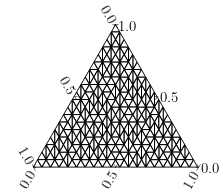

In [22]:
# Simple ternary grid
grid = np.asarray(polyphase.makegridnd(20, 3)).T
tri = Delaunay(grid[:,:2])

with plt.style.context('science'):
    fig, ax = plt.subplots(subplot_kw={'projection':'ternary'})
    for s in tri.simplices:
        simplex_points = np.asarray([grid[x,:] for x in s])
        ax.fill(simplex_points[:,2], simplex_points[:,0], simplex_points[:,1],
                facecolor='w', edgecolor='k')
    plt.savefig('../figures/final/figure1_inti_grid.png', dpi=500, bbox_inches='tight')
    plt.show()

In [27]:
M = [1,1,1]
chi =[3,3,3]
meshsize = 100
f = lambda x : polyphase.flory_huggins(x, M, chi)
engine = polyphase.PHASE(f,200,len(M))
engine.compute()

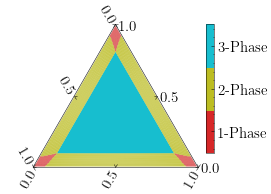

In [29]:
with plt.style.context('science'):
    fig, ax = plt.subplots(subplot_kw={'projection':'ternary'})
    render = polyphase.TernaryPlot(engine)
    render.plot_simplices(ax = ax)
    ax.set_tlabel('')
    ax.set_llabel('')
    ax.set_rlabel('')
    plt.savefig('../figures/final/figure1_final_pd.png', dpi=500, bbox_inches='tight')
    plt.show()

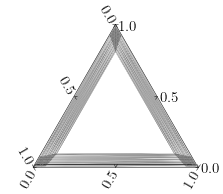

In [34]:
grid = engine.grid
with plt.style.context('science'):
    fig, ax = plt.subplots(subplot_kw={'projection':'ternary'})
    for s in engine.simplices:
        simplex_points = np.asarray([grid[:,x] for x in s])
        ax.fill(simplex_points[:,2], simplex_points[:,0], simplex_points[:,1],
                facecolor='w', edgecolor='k', lw=0.1)
    plt.savefig('../figures/final/figure1_convexified_grid.png', dpi=500, bbox_inches='tight')

    plt.show()

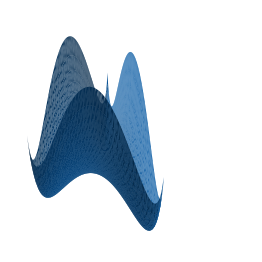

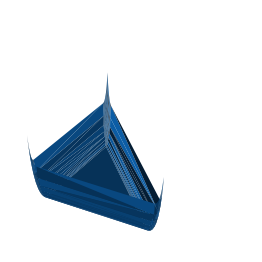

In [38]:
engine = polyphase.PHASE(f,100,len(M))
engine.compute()

grid = engine.grid
energy = engine.energy
labels = engine.df.loc['label',:].to_numpy()
boundary_points= np.asarray([engine.is_boundary_point(x) for x in engine.grid.T])

with plt.style.context('science'):
    for flag in [True, False]:
        fig = plt.figure(figsize=(4*1.6, 4))
        ax = fig.add_subplot(projection='3d')
        plot_energy = flag
        if plot_energy:
            ax.plot_trisurf(grid[0,~boundary_points], grid[1,~boundary_points], energy[~boundary_points], 
                            linewidth=0.01, antialiased=True)
        else:
            ax.plot_trisurf(grid[0,:], grid[1,:], energy, triangles=engine.simplices,
                            linewidth=0.01, antialiased=True)

        ax.set_zlim(-0.12, 0.0)
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        ax.axis('off')
        plt.tight_layout()
        if plot_energy:
            plt.savefig('../figures/final/figure1_3d_energy_surface.png', dpi=500, bbox_inches='tight')    
        else:
            plt.savefig('../figures/final/figure1_3d_convefied_energy.png', dpi=500, bbox_inches='tight')

        plt.show()